ESSENTIALS PHASE 

FRAMING: Technology should be present in the PK-12 spaces to benefit and further learning, but how it actually utilized is not fully understood. According to Riddell & Song (2017), "[...] edcuation has a causal impact on some measures of technology use and adoption" and therefore its use should be understood as it impacts the future workforce. Unfortunately, educators may be using technology in the educational space, mainly for non-instructional purposes (Getenet, 2019). Why could this be? How do teachers decide when and how to use technology and what is fueling this decision? As stated by Arrington (2022), "the data reveals that there is an ever-constant need for the implementation and use of technology in schools to be closely monitored so that things like cost associated with technology programs [...] are consistently adjusted and considered."

In [1]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [4]:
import secret # My Reddit credentials
import praw 
import pandas as pd
import csv

In [16]:
# Testing to see if credentials are accepted
reddit = praw.Reddit(user_agent ="EdTech (by /u/Innov_Edu_ASU)",
                client_id = '8cVNTeSGwLBhAkFaZbWmUg', client_secret = 'fJn0ELnjzlzL0HHzjVgLbOLi4wbpIQ',
                username='Innov_Edu_ASU',password='wFSNZ8$w9n7CPg)')

Searching for keywords mentioned

In [17]:
keyword_list = '"edtech"'

In [18]:
REDDIT_URL = "https://reddit.com"
all = reddit.subreddit("all")
df = pd.DataFrame()

titles=[]
scores=[]
ids=[]
urls=[]

for submission in all.search(keyword_list,limit=None):
    titles.append(submission.title)
    scores.append(submission.score)
    ids.append(submission.id)
    urls.append(REDDIT_URL + submission.permalink)
        
df['Title'] = titles
df['Id']=ids
df['Upvotes']=scores
df['url']=urls

print(df.shape)
df.head(10)

(240, 4)


,Title,Id,Upvotes,url
0,Edtech Sales,197fwx1,17,https://reddit.com/r/sales/comments/197fwx1/ed...
1,Edtech Startup,1430ldc,0,https://reddit.com/r/startups/comments/1430ldc...
2,Stay in Edtech vs Moving to Healthtech,14uam1t,7,https://reddit.com/r/edtech/comments/14uam1t/s...
3,Teacher looking to transition to edtech - any ...,127gzz0,19,https://reddit.com/r/edtech/comments/127gzz0/t...
4,Any EdTech product managers here?,idusoo,5,https://reddit.com/r/ProductManagement/comment...
5,"People ""in edtech"", what is exactly is you'd s...",17x99ci,14,https://reddit.com/r/edtech/comments/17x99ci/p...
6,How to get a job in the edtech industry?,r7hbvh,18,https://reddit.com/r/edtech/comments/r7hbvh/ho...
7,Physicswallah's Growing Edtech Empire,1aynjay,143,https://reddit.com/r/StartUpIndia/comments/1ay...
8,Our fellow Subredditor Pradeep Poonia's voice ...,rgusvi,2505,https://reddit.com/r/india/comments/rgusvi/our...
9,'One rotten apple should not affect the Indian...,1as17bz,512,https://reddit.com/r/StartUpIndia/comments/1as...


In [19]:
df.to_csv('EdReddit.csv',index=False)

<Axes: >

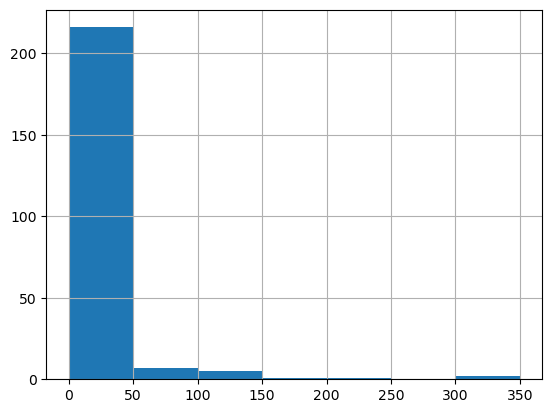

In [20]:
df["Upvotes"].hist(bins=[0,50,100,150,200,250,300,350])

In [21]:
df.describe()

,Upvotes
count,240.000000
mean,55.466667
std,301.733387
min,0.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,3410.000000


In [22]:
import numpy as np

def create_sentiment(Upvotes):
    """
    creating a function that categorizes posts as 'negative' based on 
    lower upvotes and 'positive' based on higher upvotes

    """
    if Upvotes < 55:
        return -1 # negative sentiment
    elif Upvotes >= 55:
        return 1 # positive sentiment

df['Sentiment'] = df['Upvotes'].apply(create_sentiment)

In [23]:
df.head(10)

,Title,Id,Upvotes,url,Sentiment
0,Edtech Sales,197fwx1,17,https://reddit.com/r/sales/comments/197fwx1/ed...,-1
1,Edtech Startup,1430ldc,0,https://reddit.com/r/startups/comments/1430ldc...,-1
2,Stay in Edtech vs Moving to Healthtech,14uam1t,7,https://reddit.com/r/edtech/comments/14uam1t/s...,-1
3,Teacher looking to transition to edtech - any ...,127gzz0,19,https://reddit.com/r/edtech/comments/127gzz0/t...,-1
4,Any EdTech product managers here?,idusoo,5,https://reddit.com/r/ProductManagement/comment...,-1
5,"People ""in edtech"", what is exactly is you'd s...",17x99ci,14,https://reddit.com/r/edtech/comments/17x99ci/p...,-1
6,How to get a job in the edtech industry?,r7hbvh,18,https://reddit.com/r/edtech/comments/r7hbvh/ho...,-1
7,Physicswallah's Growing Edtech Empire,1aynjay,143,https://reddit.com/r/StartUpIndia/comments/1ay...,1
8,Our fellow Subredditor Pradeep Poonia's voice ...,rgusvi,2505,https://reddit.com/r/india/comments/rgusvi/our...,1
9,'One rotten apple should not affect the Indian...,1as17bz,512,https://reddit.com/r/StartUpIndia/comments/1as...,1


Seems like EdTech is largely finance/company based if searching in all of reddit.  Few mentions of learning, but AI is heavily mentioned... Can I narrow down to education based subreddits, and see how AI is discussed? 

In [24]:
# Preprocessing the title column to remove certain characters using regex
from sklearn.feature_extraction.text import re

def clean_data(Title):
    """
    function which remove punctuation, characters, and digits

    """
    no_punc = re.sub(r'[^\w\s]', '', Title)
    no_digits = ''.join([i for i in no_punc if not i.isdigit()])

    return(no_digits)

In [25]:
df['Title'][0:10]

0                                         Edtech Sales
1                                       Edtech Startup
2               Stay in Edtech vs Moving to Healthtech
3    Teacher looking to transition to edtech - any ...
4                    Any EdTech product managers here?
5    People "in edtech", what is exactly is you'd s...
6             How to get a job in the edtech industry?
7                Physicswallah's Growing Edtech Empire
8    Our fellow Subredditor Pradeep Poonia's voice ...
9    'One rotten apple should not affect the Indian...
Name: Title, dtype: object

In [26]:
df['Title'] = df['Title'].apply(clean_data)
df['Title'][0:10]

0                                         Edtech Sales
1                                       Edtech Startup
2               Stay in Edtech vs Moving to Healthtech
3    Teacher looking to transition to edtech  any s...
4                     Any EdTech product managers here
5    People in edtech what is exactly is youd say y...
6              How to get a job in the edtech industry
7                 Physicswallahs Growing Edtech Empire
8    Our fellow Subredditor Pradeep Poonias voice a...
9    One rotten apple should not affect the Indian ...
Name: Title, dtype: object

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False,
                        preprocessor=None)
X = tfidf.fit_transform(df['Title'])

In [28]:
from sklearn.model_selection import train_test_split
y = df['Sentiment'] # target variable
X_train, X_test,  y_train, y_test = train_test_split(X,y)

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train) # fitting the model
preds = lr.predict(X_test)

In [30]:
# test the performance of the model
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test)

0.9333333333333333

In [31]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [32]:
import numpy as np 
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [33]:
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [34]:
text = " ".join(review for review in df.Title)
print("There are {} words in the combination of all review.".format(len(text)))

There are 11653 words in the combination of all review.


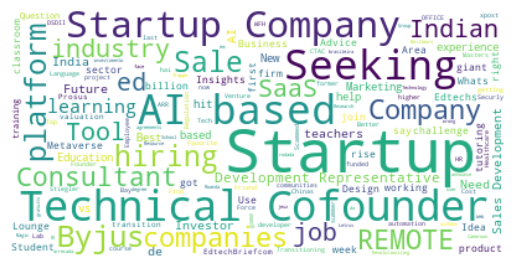

In [36]:
stopwords = set(STOPWORDS)
stopwords.update(["looking","teacher","dont","EdTech"])

wordcloud = WordCloud(stopwords=stopwords,background_color="white",max_font_size=50).generate(text)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

I would like to dive more deeply into how AI is discussed in edtech/K-12 education subreddits.
AI is highy involved topic that is influecning education, but how much of it is based on influence from tech companies, districts, or personal educator needs?  
In other words, why/how are educators deciding on using AI for/in the classroom? 